
# Mathematics and  Datasets

**Gerd Duscher**

04/16/2020

**Please download this example and run it as a notebook by scrolling to the
bottom of this page**


In [1]:
# Ensure python 3 compatibility:
from __future__ import division, print_function, absolute_import, unicode_literals
%matplotlib widget

import numpy as np
import sys
sys.path.insert(0,'../../')
import sidpy

print(sidpy.__version__)

0.12.1


## Creating an Image Dataset
First, we make a sidpy dataset from a numpy array, with all the information to plot it. 

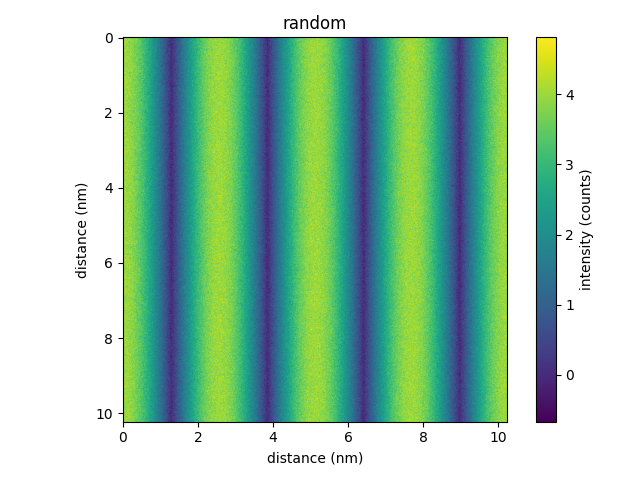

In [2]:
t = np.linspace(0, 4*np.pi, 512)
x = np.array(np.zeros((512,512)) + 4*abs(np.cos(t)[:, np.newaxis]) + np.random.normal(0, 0.2, size=(512, 512)))

dset = sidpy.Dataset.from_array(x)
dset.data_type = 'image'
dset.units = 'counts'
dset.quantity = 'intensity'
dset.title = 'random'
dset.set_dimension(0, sidpy.Dimension(np.arange(dset.shape[0])*.02, 'x'))
dset.x.dimension_type = 'spatial'
dset.x.units = 'nm'
dset.x.quantity = 'distance'
dset.set_dimension(1, sidpy.Dimension(np.arange(dset.shape[1])*.02, 'y'))
dset.y.dimension_type = 'spatial'
dset.y.units = 'nm'
dset.y.quantity = 'distance'
view = dset.plot()

We have the capability to store the variance of our data within the sidpy.Dataset by either adding an additional attribute variance using ``sidpy.Dataset.from_array(x, variance=var)`` or by directly saving our variance array in ``sidpy.Dataset.variance``

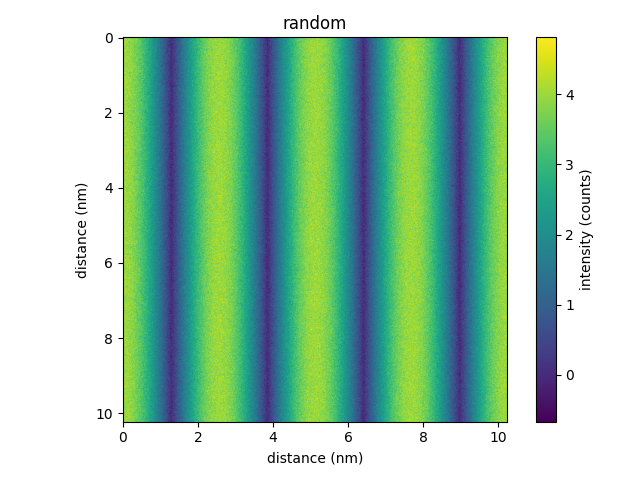

In [3]:
x_var = np.array(np.random.normal(1, 0.1, size=(512, 512))+ abs(np.sin(t)[np.newaxis,:]))

dset.variance = x_var
dset.plot();

## Simple Arithmetic 

First we subtract the min of this image, and we want to have the rest of the information unchanged

So we use the minimum function and do a subtraction.


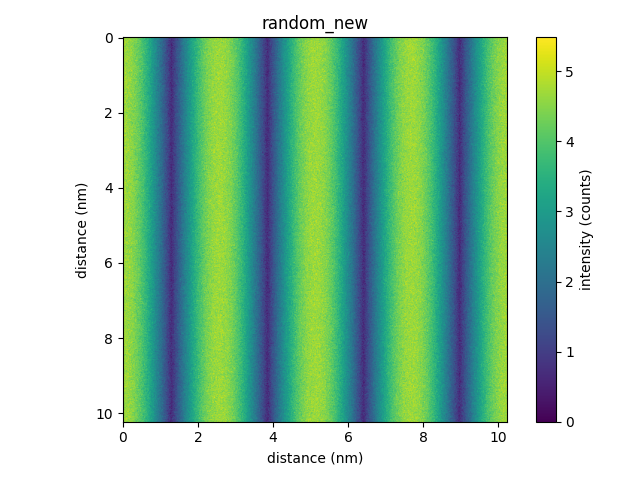

In [4]:
dset = dset - dset.min()
view = dset.plot()

### Plotting a Complex Image
What if the data form a complex image?

Because, we do not want to start all over again, we will use the ``like_data`` function, 
which copies all metadata onto the new dataset.

The resulting plot consists of two images, which share however the axes, try it out and zoom into one image.

Another feature of the ``plot`` function is that you can add any matplotlib keywords and values to the plot. 

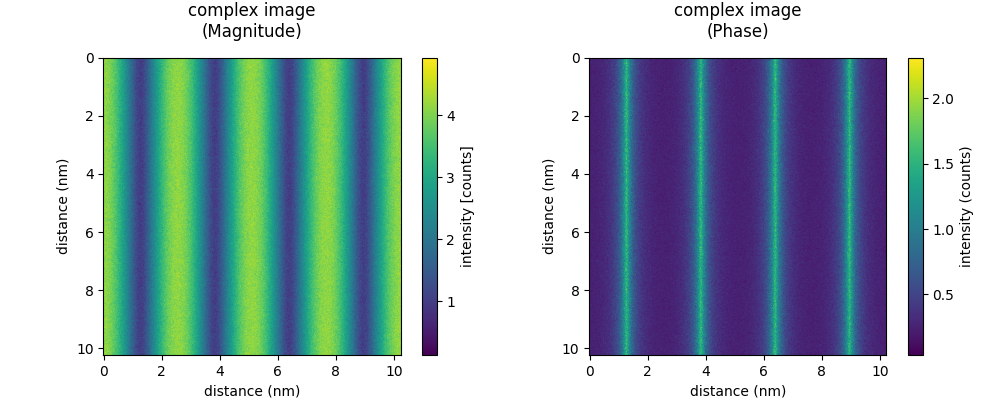

In [5]:
x_c = x + np.random.normal(1, 0.2, size=(512, 512)) *1j
dset_complex  = dset.like_data(x_c, 'complex image')
view = dset_complex.plot(figsize=(10,4))

## Plotting a spectrum

A spectrum can also easily be populated with the apropriete metadata.

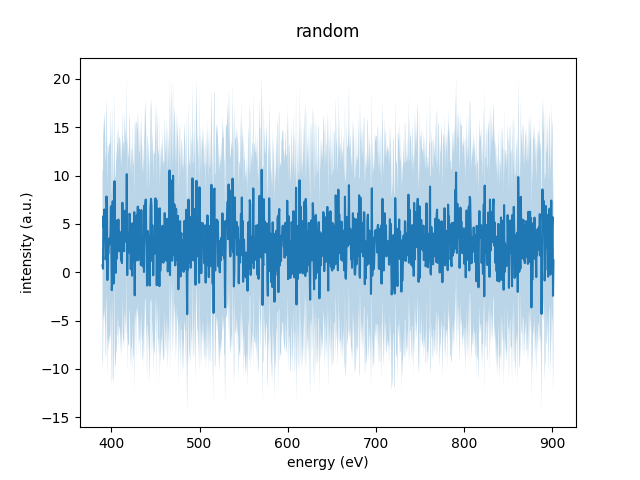

In [6]:
x = np.random.normal(3, 2.5, size=(1024))
x_var = np.random.normal(10, 0.2, size=(1024))

dset = sidpy.Dataset.from_array(x, variance=x_var)

# dataset metadata
dset.data_type = 'spectrum'
dset.title = 'random'
dset.quantity = 'intensity'
dset.units = 'a.u.'

# dimension with metadata
scale = .5
offset = 390
dset.set_dimension(0, sidpy.Dimension(np.arange(dset.shape[0])*scale+offset, 'energy'))
dset.dim_0.dimension_type = 'spectral'
dset.energy.units = 'eV'
dset.energy.quantity = 'energy'

view = dset.plot()

## Creating an Image-Stack DataSet
In the following we will make a numpy which resembles a stack of images

In the ``sidpy Dataset`` will set the ``data_type`` to ``image_stack`` for the plotting routine to know how to plot this dataset.

The dimensions have to contain at least two ``spatial`` dimensions and one that is identifiable as a stack dimension ('stack, 'frame', 'time').
First we make a stack of images



In [7]:
x = np.random.normal(3, 2.5, size=(25, 512, 512))
x_var = np.random.normal(10, 2.5, size=(25, 512, 512))

dset = sidpy.Dataset.from_array(x)
dset.data_type = 'image_stack'
dset.units = 'counts'
dset.quantity = 'intensity'

dset.variance = x_var

dset.set_dimension(0, sidpy.Dimension(np.arange(dset.shape[0]), 'frame'))
dset.frame.dimension_type = 'temporal'
dset.set_dimension(1, sidpy.Dimension(np.arange(dset.shape[1])*.02, 'x'))
dset.x.dimension_type = 'spatial'
dset.x.units = 'nm'
dset.x.quantity = 'distance'
dset.set_dimension(2, sidpy.Dimension(np.arange(dset.shape[2])*.02, 'y'))
dset.y.dimension_type = 'spatial'
dset.y.units = 'nm'
dset.y.quantity = 'distance'


## Plotting the Dataset
Please note that the scroll wheel will move you through the stack, also the slider and the play button will let you navigate through this image stack.

Zoom to an area and let it play!

Click on the ``Average`` button and then click on it again.



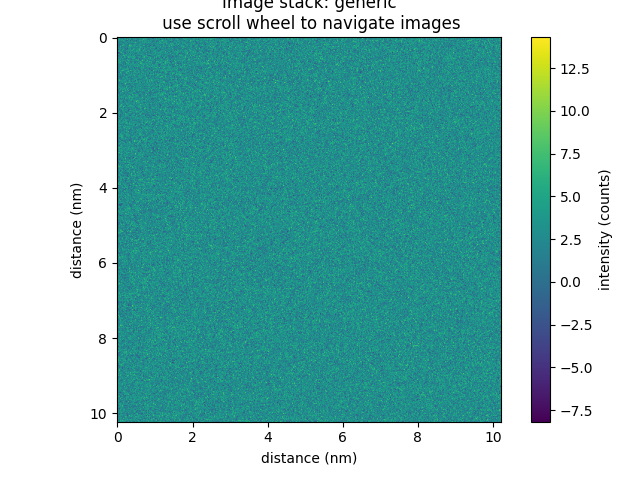

In [8]:
view = dset.plot()

The kwargs dictionary is used to plot the image stack in TEM style with scale bar



Shape of dataset is:  (25, 512, 512)
3D dataset


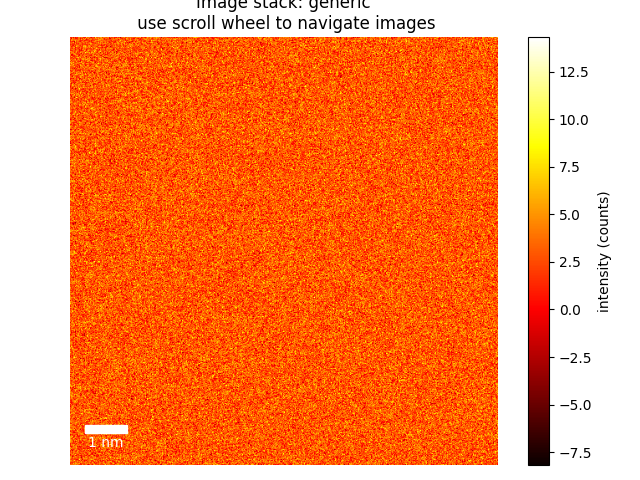

In [9]:
kwargs = {'scale_bar': True, 'cmap': 'hot'}  # or maby 'cmap': 'gray'
 
view = dset.plot(verbose=True, **kwargs)

## Plot Dataset as Spectral Image
We need to change the data_type of the dataset to ``spectral_image`` and the dimension_type of one dimension to ``spectral``.

Now the plot function plots it as a spectrum image.

Select the spectrum with the mouse (left click).



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


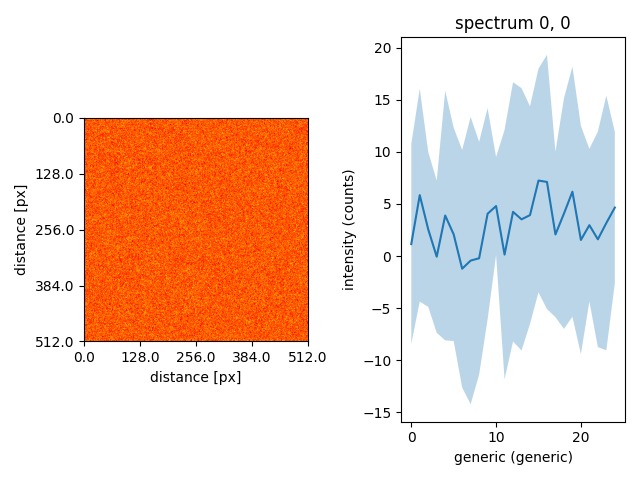

In [10]:
dset.data_type = 'spectral_image'
dset.set_dimension(0, sidpy.Dimension(np.arange(dset.shape[0]),'spectrum'))
dset.spectrum.dimension_type = 'spectral'
#dset[0,0,:] *=20
kwargs = {'scale_bar': True, 'cmap': 'hot'}
view = dset.plot(**kwargs)
# Note:
# Double click in right panel will zoom to full scale

We make the selection more visible by setting the binning of the spectra selection.

The binning avrages over the binning box.

Run the code-cell below and look in the plot ``above``.



In [11]:
dset.view.set_bin([5, 5])

The axes (and figure) instances of matplotlib can be accessed throught the ``view`` attribute of  the sidpy dataset.

The code cell below will draw a red square lattice on the plot ``above``


In [12]:
x, y = np.mgrid[0:501:100, 0:501:100] + 5
dset.view.axes[0].scatter(x, y, color='red');

The plotting routine can also be used independently. 

Please note, that a reference (here the variable `view`) must be maintained for interactive plotting.

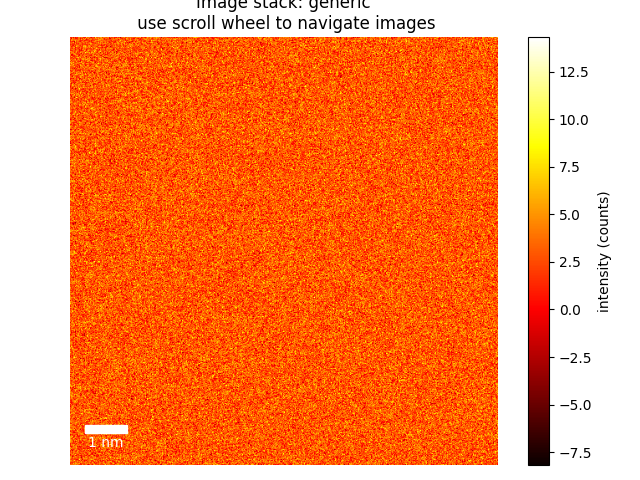

In [13]:
kwargs = {'scale_bar': True, 'cmap': 'hot', }
dset.set_dimension(0, sidpy.Dimension(np.arange(dset.shape[0]),'frame'))
dset.frame.dimension_type = 'temporal'

view = sidpy.viz.dataset_viz.ImageStackVisualizer(dset, **kwargs)

In the same way as above, we can plot the dataset as an image. 

Please note, that we did not have to set the `data_type` of the dataset.

(25, 512, 512)


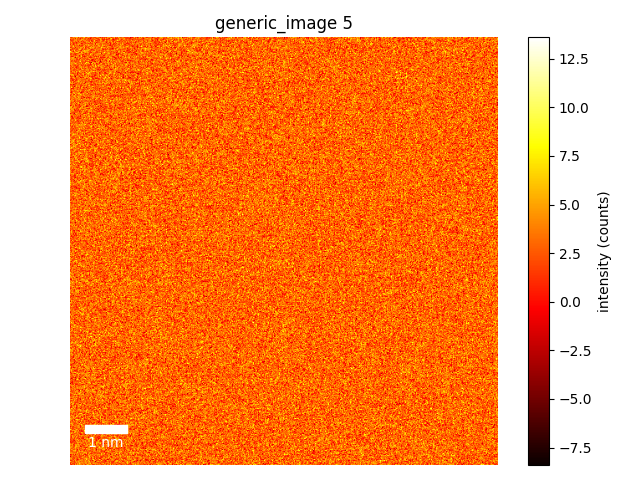

In [14]:
print(dset.shape)
kwargs = {'scale_bar': True, 'cmap': 'hot'}
view = sidpy.viz.dataset_viz.ImageVisualizer(dset, image_number=5, **kwargs)

## 4-Dimensional Dataset
A 4-dimensional dataset can be visualized as easily.


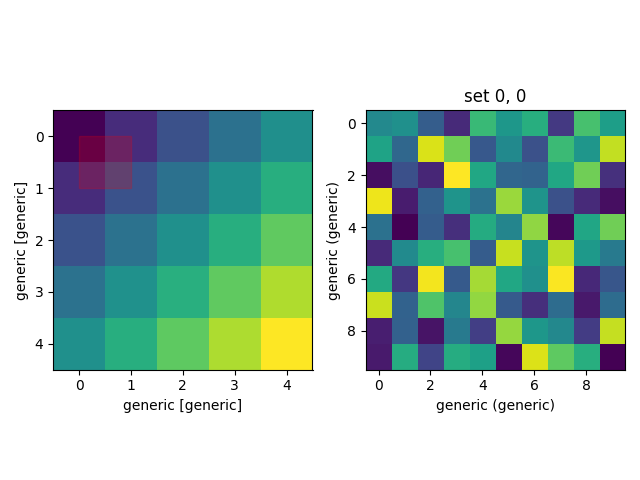

In [15]:
data = np.random.random([5,5,10,10])
for i in range(5):
    for j in range(5):
        data[i,j]+=(i+j)
#kwargs=(scan_x=0, scan_y=1)
dataset = sidpy.Dataset.from_array(data)
dataset.data_type='Image_4d'
dataset.plot();

We have the following parameters to influence the plot:
- scan_x, scan_y
- image_4d_x, image_4d_y
Those parameters are supposed to be integers givin the dimension of the dataset.

In the plot above where none of these parameters are specified we assume slowest to fastest change of dimensions.

But below, we switch scanned and image dimensions of th 4d dataset.


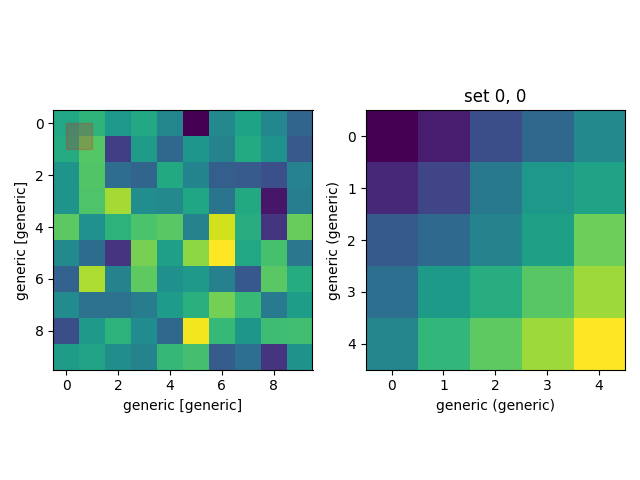

In [16]:
dataset.plot(scan_x=3,scan_y=2, image_4d_x=1, image_4d_y=0);

## Plotting of Point Cloud 

Point Clouds can be represented by the 2D ``sidpy Dataset`` with one ``point_cloud`` dimension and one ``spectral`` dimension or by the 3D ``sidpy Dataset`` with one more ``channel`` dimension. 

A ``point_cloud`` dimension represents point number, while the real points coordinates must be stored in the ``sidpy.Dataset.point_cloud``. To customize spatial units and quantities for specific coordinates, simply extend the ``sidpy.Dataset.point_cloud`` dictionary with the relevant values.


### 2D

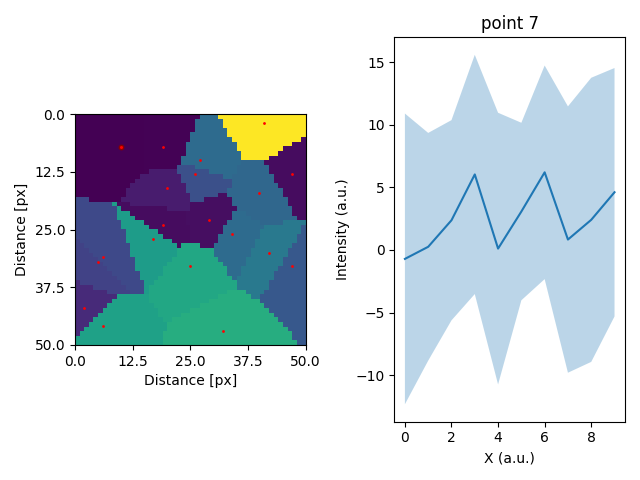

In [270]:
data = np.random.normal(3, 2.5, size=(20,10))
data_var = np.random.normal(10, 2.5, size=(20,10))
coordinates = np.random.rand(20,2)+10

dset = sidpy.Dataset.from_array(data, coordinates = coordinates)
dset.data_type = 'point_cloud'

dset.variance = data_var
dset.point_cloud['spacial_units'] = 'um'
dset.point_cloud['quantity'] = 'Distance'

dset.set_dimension(0, sidpy.Dimension(np.arange(data.shape[0]),
                                    name='point number',
                                    quantity='Point number',
                                    dimension_type='point_cloud'))

dset.set_dimension(1, sidpy.Dimension(np.arange(data.shape[1]),
                                    name='X',
                                    units='a.u.',
                                    quantity='X',
                                    dimension_type='spectral'))
dset.units = 'a.u.'
dset.quantity = 'Intensity'

view = dset.plot();

In [265]:
dset.view.axes[1].lines[0].get_ydata()

array([4.6805256 , 3.65467992, 2.67673733, 1.64671048, 5.68927792,
       2.19507524, 3.83120101, 3.21568454, 3.63582981, 6.77946736])

In [269]:
dset[8].compute()

array([4.6805256 , 3.65467992, 2.67673733, 1.64671048, 5.68927792,
       2.19507524, 3.83120101, 3.21568454, 3.63582981, 6.77946736])

### 3D

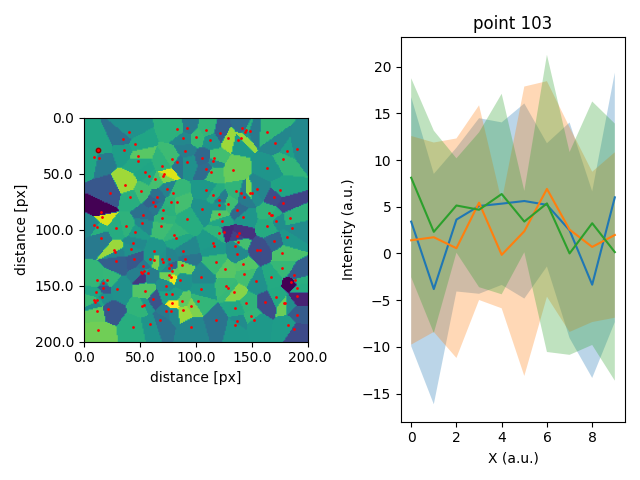

In [18]:
data = np.random.normal(3, 2.5, size=(200,3,10))
data_var = np.random.normal(10, 2.5, size=(200,3,10))
coordinates = np.random.rand(200,2)+7

dset = sidpy.Dataset.from_array(data, coordinates = coordinates)
dset.data_type = 'point_cloud'
dset.variance = data_var

dset.set_dimension(0, sidpy.Dimension(np.arange(data.shape[0]),
                                    name='point number',
                                    quantity='Point number',
                                    dimension_type='point_cloud'))

dset.set_dimension(1, sidpy.Dimension(np.arange(data.shape[1]),
                                     name='cycle',
                                     quantity='Cycle',
                                     dimension_type='channel'))

dset.set_dimension(2, sidpy.Dimension(np.arange(data.shape[2]),
                                    name='X',
                                    units='a.u.',
                                    quantity='X',
                                    dimension_type='spectral'))
dset.units = 'a.u.'
dset.quantity = 'Intensity'
view = dset.plot();

### Point cloud with base_image

To visualize a point cloud within the real field of view, you can use the dset.plot function by providing an additional attribute called base_name. In this case, you can call the function as follows: ``dset.plot(base_name=image_dataset)``, where image_dataset should be an instance of ``sidpy.Dataset`` with a data_type set to 'IMAGE'.


In [19]:
#image_dataset initializtion. image_dataset represents field of view
t = np.linspace(0, 6*np.pi, 512)
im_data = 4*abs(np.cos(t)[:, np.newaxis])+ 8*abs(np.cos(t)[np.newaxis,:]) + np.random.normal(0, 0.2, size=(512, 512))

image_dataset = sidpy.Dataset.from_array(im_data, datatype='image', units='counts', quantity='intensity')
image_dataset.title = 'random'
image_dataset.set_dimension(0, sidpy.Dimension(np.linspace(7, 8, image_dataset.shape[0]), 'x'))
image_dataset.x.dimension_type = 'spatial'
image_dataset.x.units = 'um'
image_dataset.x.quantity = 'distance'
image_dataset.set_dimension(1, sidpy.Dimension(np.linspace(7, 8, image_dataset.shape[1]), 'y'))
image_dataset.y.dimension_type = 'spatial'
image_dataset.y.units = 'um'
image_dataset.y.quantity = 'distance'

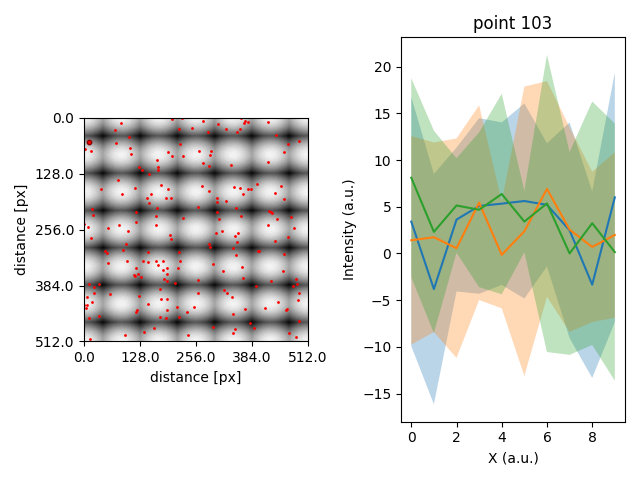

In [20]:
view = dset.plot(base_image = image_dataset, cmap='gray');